In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

https://www.kaggle.com/c/titanic

In [4]:
data = pd.read_csv('titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- PassengerId: unique id number to each passenger
- Survived: passenger survive(1) or died(0) - target
- Pclass: passenger class
- Name: name
- Sex: gender of passenger
- Age: age of passenger
- SibSp: number of siblings/spouses
- Parch: number of parents/children
- Ticket: ticket number
- Fare: amount of money spent on ticket
- Cabin: cabin category
- Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [9]:
data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [10]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Categorica data

In [11]:
category=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

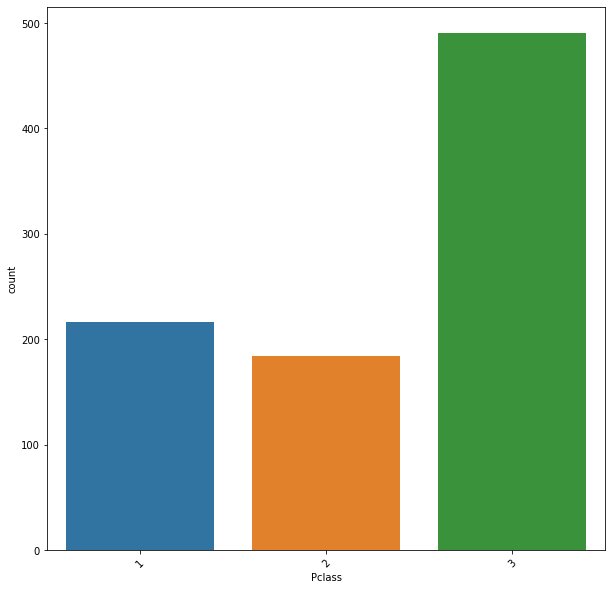

In [12]:
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(data['Pclass'])
plt.xticks(rotation=45)

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


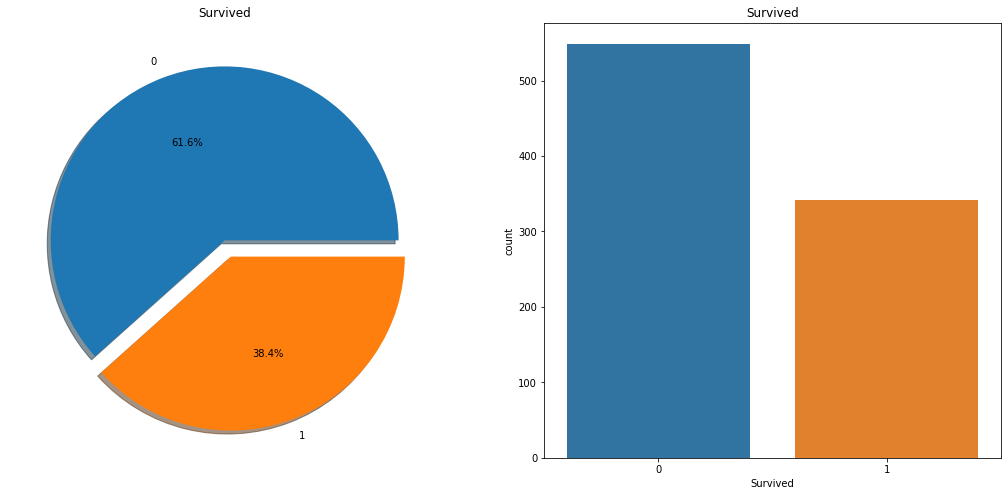

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#### Analyze Sex& Survived

In [14]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


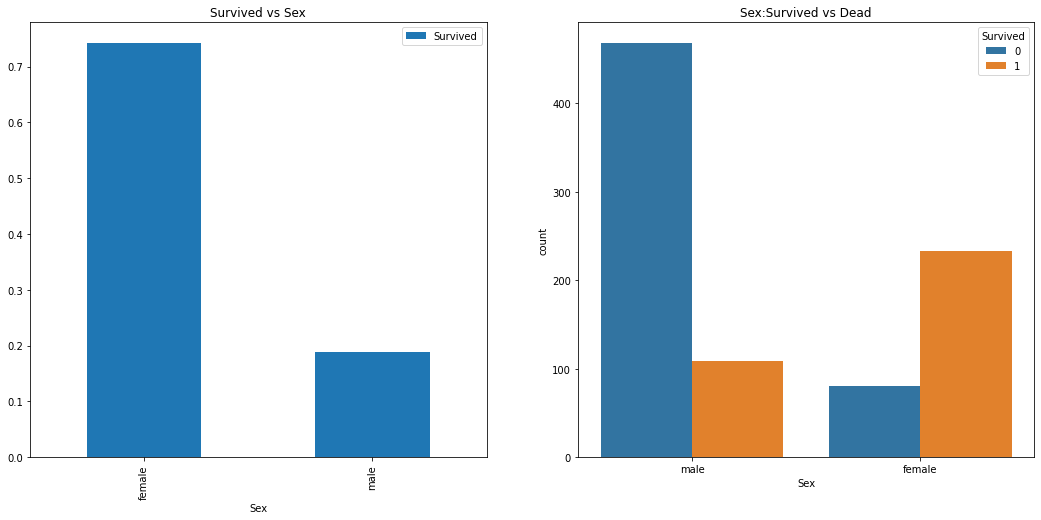

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### Pclass & Survived, Завдання 1
- знайти розподіл виживших відносно рівня кают 

<AxesSubplot:xlabel='Pclass'>

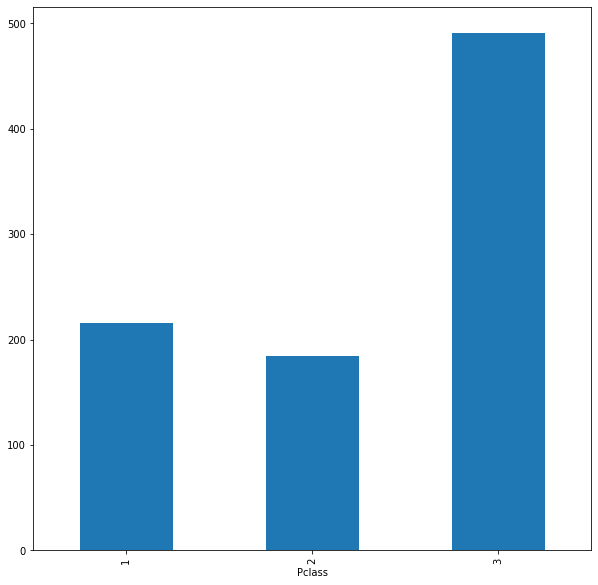

In [16]:
distribution = data.groupby(('Pclass'))['Survived'].count()
distribution.plot.bar()

### Age & Survived

In [25]:
data['age_group']=data['Age'].apply(lambda x: 'child' if x<18 else( 'young' if (x>=18) and (x< 30) 
                                                                   else( 'middle' if (x>=30) and (x< 60) else 'old'
                                                                       )
                                                                  )
                                   )


In [26]:
data[['Age','age_group']].head(10)

,Age,age_group
0,22.0,young
1,38.0,middle
2,26.0,young
3,35.0,middle
4,35.0,middle
5,NaN,old
6,54.0,middle
7,2.0,child
8,27.0,young
9,14.0,child


ToDo 'Nan' як боротись?

In [27]:
data['age_group']=data['Age'].apply(lambda x: 'child' if x<18 else( 'young' if (x>=18) and (x< 30) 
                                                                   else( 'middle' if (x>=30) and (x< 60) else (
                                                                   'old' if x>=60 else 'missing')
                                                                       )
                                                                  )
                                   )


In [28]:
data[['Age','age_group']].head(15)

,Age,age_group
0,22.0,young
1,38.0,middle
2,26.0,young
3,35.0,middle
4,35.0,middle
5,NaN,missing
6,54.0,middle
7,2.0,child
8,27.0,young
9,14.0,child


### Завдання 2

- знайти розподіл виживших відносно віку 

<AxesSubplot:xlabel='age_category'>

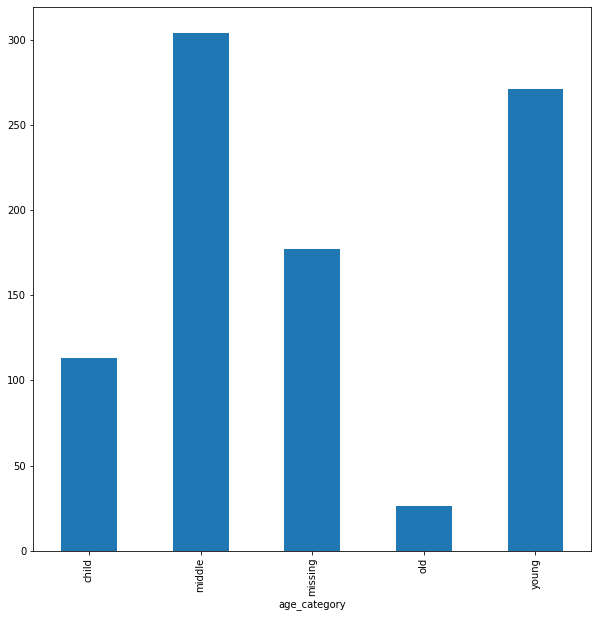

In [30]:
result = data.groupby('age_category')['Survived'].count()
result.plot.bar()

### SibSp & Survived Завдання 3

- знайти розподіл виживших відносно наявності родичей на Титаніку

<AxesSubplot:xlabel='SibSp'>

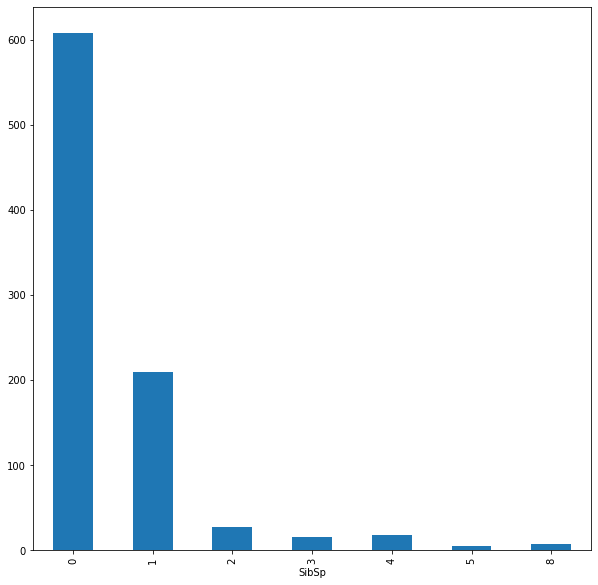

In [23]:
result = data.groupby('SibSp')['Survived'].count()
result.plot.bar()

### Parch & Survived. Завдання 4
- знайти розподіл виживших відносно наявності батьків-дітей на Титаніку

<AxesSubplot:xlabel='Parch'>

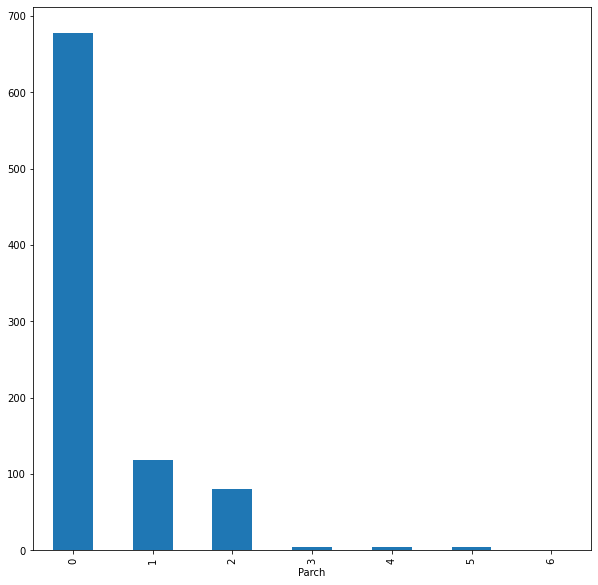

In [31]:
result = data.groupby('Parch')['Survived'].count()
result.plot.bar()

### Missing values

In [32]:
data.columns[data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [33]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
age_group         0
age_category      0
dtype: int64

#### Fill Missing Value¶

In [34]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,age_category
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,middle,middle
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,old,old


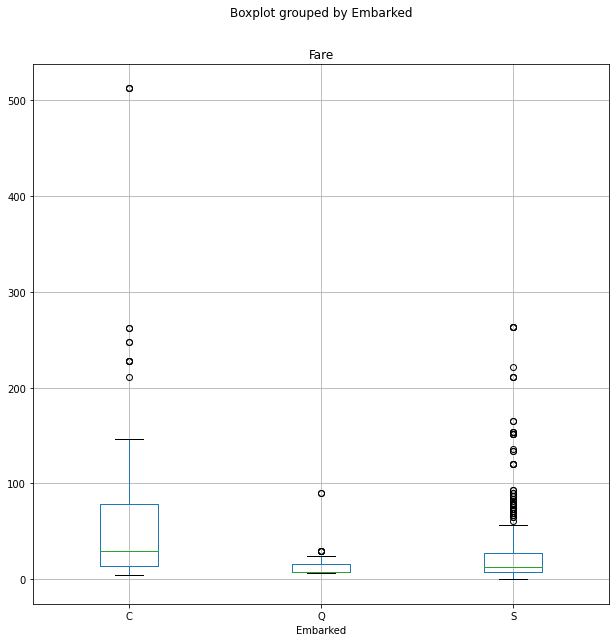

In [35]:
data.boxplot(column = "Fare", by = "Embarked")
plt.show()

In [37]:
data["Embarked"] = data["Embarked"].fillna("C")

In [38]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,age_category


#### Missing Age

In [39]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,age_category
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,missing,missing
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,missing,missing
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,missing,missing
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,missing,missing
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,missing,missing
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,missing,missing
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,missing,missing
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,missing,missing


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [40]:
data.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [41]:
names = data.Name
names

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [42]:
name_list = []
for name in names:
    name = name.split(".")  
    name_list.append(name)

In [43]:
name_list

[['Braund, Mr', ' Owen Harris'],
 ['Cumings, Mrs', ' John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen, Miss', ' Laina'],
 ['Futrelle, Mrs', ' Jacques Heath (Lily May Peel)'],
 ['Allen, Mr', ' William Henry'],
 ['Moran, Mr', ' James'],
 ['McCarthy, Mr', ' Timothy J'],
 ['Palsson, Master', ' Gosta Leonard'],
 ['Johnson, Mrs', ' Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Nasser, Mrs', ' Nicholas (Adele Achem)'],
 ['Sandstrom, Miss', ' Marguerite Rut'],
 ['Bonnell, Miss', ' Elizabeth'],
 ['Saundercock, Mr', ' William Henry'],
 ['Andersson, Mr', ' Anders Johan'],
 ['Vestrom, Miss', ' Hulda Amanda Adolfina'],
 ['Hewlett, Mrs', ' (Mary D Kingcome) '],
 ['Rice, Master', ' Eugene'],
 ['Williams, Mr', ' Charles Eugene'],
 ['Vander Planke, Mrs', ' Julius (Emelia Maria Vandemoortele)'],
 ['Masselmani, Mrs', ' Fatima'],
 ['Fynney, Mr', ' Joseph J'],
 ['Beesley, Mr', ' Lawrence'],
 ['McGowan, Miss', ' Anna "Annie"'],
 ['Sloper, Mr', ' William Thompson'],
 ['Palsson, Miss', ' Torborg Danira'],
 [

In [44]:
first_part = []
for words in name_list:
    first_part.append(words[0])

In [45]:
first_part

['Braund, Mr',
 'Cumings, Mrs',
 'Heikkinen, Miss',
 'Futrelle, Mrs',
 'Allen, Mr',
 'Moran, Mr',
 'McCarthy, Mr',
 'Palsson, Master',
 'Johnson, Mrs',
 'Nasser, Mrs',
 'Sandstrom, Miss',
 'Bonnell, Miss',
 'Saundercock, Mr',
 'Andersson, Mr',
 'Vestrom, Miss',
 'Hewlett, Mrs',
 'Rice, Master',
 'Williams, Mr',
 'Vander Planke, Mrs',
 'Masselmani, Mrs',
 'Fynney, Mr',
 'Beesley, Mr',
 'McGowan, Miss',
 'Sloper, Mr',
 'Palsson, Miss',
 'Asplund, Mrs',
 'Emir, Mr',
 'Fortune, Mr',
 "O'Dwyer, Miss",
 'Todoroff, Mr',
 'Uruchurtu, Don',
 'Spencer, Mrs',
 'Glynn, Miss',
 'Wheadon, Mr',
 'Meyer, Mr',
 'Holverson, Mr',
 'Mamee, Mr',
 'Cann, Mr',
 'Vander Planke, Miss',
 'Nicola-Yarred, Miss',
 'Ahlin, Mrs',
 'Turpin, Mrs',
 'Kraeff, Mr',
 'Laroche, Miss',
 'Devaney, Miss',
 'Rogers, Mr',
 'Lennon, Mr',
 "O'Driscoll, Miss",
 'Samaan, Mr',
 'Arnold-Franchi, Mrs',
 'Panula, Master',
 'Nosworthy, Mr',
 'Harper, Mrs',
 'Faunthorpe, Mrs',
 'Ostby, Mr',
 'Woolner, Mr',
 'Rugg, Miss',
 'Novel, Mr',
 '

In [46]:
gender_list = []
for word in first_part:
    word = word.split(",")
    gender_list.append(word)

In [47]:
gender_list

[['Braund', ' Mr'],
 ['Cumings', ' Mrs'],
 ['Heikkinen', ' Miss'],
 ['Futrelle', ' Mrs'],
 ['Allen', ' Mr'],
 ['Moran', ' Mr'],
 ['McCarthy', ' Mr'],
 ['Palsson', ' Master'],
 ['Johnson', ' Mrs'],
 ['Nasser', ' Mrs'],
 ['Sandstrom', ' Miss'],
 ['Bonnell', ' Miss'],
 ['Saundercock', ' Mr'],
 ['Andersson', ' Mr'],
 ['Vestrom', ' Miss'],
 ['Hewlett', ' Mrs'],
 ['Rice', ' Master'],
 ['Williams', ' Mr'],
 ['Vander Planke', ' Mrs'],
 ['Masselmani', ' Mrs'],
 ['Fynney', ' Mr'],
 ['Beesley', ' Mr'],
 ['McGowan', ' Miss'],
 ['Sloper', ' Mr'],
 ['Palsson', ' Miss'],
 ['Asplund', ' Mrs'],
 ['Emir', ' Mr'],
 ['Fortune', ' Mr'],
 ["O'Dwyer", ' Miss'],
 ['Todoroff', ' Mr'],
 ['Uruchurtu', ' Don'],
 ['Spencer', ' Mrs'],
 ['Glynn', ' Miss'],
 ['Wheadon', ' Mr'],
 ['Meyer', ' Mr'],
 ['Holverson', ' Mr'],
 ['Mamee', ' Mr'],
 ['Cann', ' Mr'],
 ['Vander Planke', ' Miss'],
 ['Nicola-Yarred', ' Miss'],
 ['Ahlin', ' Mrs'],
 ['Turpin', ' Mrs'],
 ['Kraeff', ' Mr'],
 ['Laroche', ' Miss'],
 ['Devaney', ' Miss'],

In [48]:
genders = []
for gender in gender_list:
    genders.append(gender[-1].strip())

In [49]:
set(genders)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

### Завдання 5

Чи можна, базуючись на `set(genders)` придумати, як заповнити пропущені значення в `Age`? Знайти спосіб заповнення пропущенних значень, можна користуватись додатковими фічами - сімейний склад, наявність дітей тощо...

### Завдання 6

Знайти додаткові спостереження, подумати про додаткові ознаки, які можна згенерувати, щоб потім можна було їх вікористовувати для прогнозу (Виживе/Загине)